In [1]:
# WeatherPy
## Starter Code to Generate Random Geographic Coordinates and a List of Cities

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=imperial&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
   
        # Parse the JSON and retrieve data
    
    response = requests.get(city_url)
  
   
    if response.status_code == 200:
        city_weather = response.json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    else:

    # If an error is experienced, skip the city
    #except:
        print("City not found. Skipping...")
        
       
        
    
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yura
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | ponta delgada
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | batamshinskiy
Processing Record 7 of Set 1 | santa adelia
Processing Record 8 of Set 1 | constantia
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | colonia
Processing Record 11 of Set 1 | tazovsky
Processing Record 12 of Set 1 | margaret river
Processing Record 13 of Set 1 | wailua homesteads
Processing Record 14 of Set 1 | toga village
City not found. Skipping...
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | weno
Processing Record 17 of Set 1 | qaqortoq
Processing Record 18 of Set 1 | marabba
Processing Record 19 of Set 1 | chonchi
Processing Record 20 of Set 1 | al bawiti
Processing Record 21 of Set 1 | kone
Processing Record 22 of Set 1 | ka

Processing Record 40 of Set 4 | crane
Processing Record 41 of Set 4 | hastings
Processing Record 42 of Set 4 | setti fatma
City not found. Skipping...
Processing Record 43 of Set 4 | toliara
Processing Record 44 of Set 4 | grand falls-windsor
Processing Record 45 of Set 4 | holualoa
Processing Record 46 of Set 4 | kununurra
Processing Record 47 of Set 4 | san pedro de uraba
Processing Record 48 of Set 4 | thatta
Processing Record 49 of Set 4 | bargaal
Processing Record 0 of Set 5 | vila velha
Processing Record 1 of Set 5 | east london
Processing Record 2 of Set 5 | port saint john's
Processing Record 3 of Set 5 | kaitong
Processing Record 4 of Set 5 | conduaga
Processing Record 5 of Set 5 | elmendorf air force base
City not found. Skipping...
Processing Record 6 of Set 5 | jining
Processing Record 7 of Set 5 | ahau
City not found. Skipping...
Processing Record 8 of Set 5 | naze
Processing Record 9 of Set 5 | belmonte
Processing Record 10 of Set 5 | kushiro
Processing Record 11 of Set 5

Processing Record 32 of Set 8 | icano
Processing Record 33 of Set 8 | hilo
Processing Record 34 of Set 8 | lanzhou
Processing Record 35 of Set 8 | portsmouth
Processing Record 36 of Set 8 | cabo san lucas
Processing Record 37 of Set 8 | bodaybo
Processing Record 38 of Set 8 | pariaman
Processing Record 39 of Set 8 | argostolion
Processing Record 40 of Set 8 | egilsstadir
Processing Record 41 of Set 8 | aripuana
Processing Record 42 of Set 8 | khash
Processing Record 43 of Set 8 | quepos
Processing Record 44 of Set 8 | kerikeri
Processing Record 45 of Set 8 | barabai
Processing Record 46 of Set 8 | kirakira
Processing Record 47 of Set 8 | flying fish cove
Processing Record 48 of Set 8 | vadso
Processing Record 49 of Set 8 | mawu
Processing Record 0 of Set 9 | brookings
Processing Record 1 of Set 9 | kulhudhuffushi
Processing Record 2 of Set 9 | rikaze
Processing Record 3 of Set 9 | chechelnyk
Processing Record 4 of Set 9 | fortuna
Processing Record 5 of Set 9 | outjo
Processing Record 6

Processing Record 21 of Set 12 | pokhara
Processing Record 22 of Set 12 | sambava
Processing Record 23 of Set 12 | yamethin
Processing Record 24 of Set 12 | puerto deseado
Processing Record 25 of Set 12 | braintree
Processing Record 26 of Set 12 | sake
Processing Record 27 of Set 12 | masterton
Processing Record 28 of Set 12 | ochakiv
Processing Record 29 of Set 12 | kidal
Processing Record 30 of Set 12 | cestos city
Processing Record 31 of Set 12 | kudymkar
Processing Record 32 of Set 12 | opuwo
Processing Record 33 of Set 12 | boyolangu
Processing Record 34 of Set 12 | esmeralda
Processing Record 35 of Set 12 | ben mehidi
Processing Record 36 of Set 12 | kuta
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
df_city_data = pd.DataFrame(city_data)

# Show Record Count
df_city_data.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [5]:
# Display sample data
df_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yura,-16.2522,-71.6797,66.72,32,75,4.61,PE,1683299916
1,tiksi,71.6872,128.8694,11.68,81,98,22.44,RU,1683299917
2,puerto natales,-51.7236,-72.4875,64.85,48,40,43.73,CL,1683299917
3,ponta delgada,37.7333,-25.6667,65.12,94,75,13.80,PT,1683299918
4,albany,42.6001,-73.9662,57.45,59,99,2.28,US,1683299919


In [6]:
#create a directory for City_Data
import os
os.makedirs("output_data", exist_ok=True)

In [7]:
# Export the City_Data into a csv
df_city_data.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
df_city_data = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
df_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yura,-16.2522,-71.6797,66.72,32,75,4.61,PE,1683299916
1,tiksi,71.6872,128.8694,11.68,81,98,22.44,RU,1683299917
2,puerto natales,-51.7236,-72.4875,64.85,48,40,43.73,CL,1683299917
3,ponta delgada,37.7333,-25.6667,65.12,94,75,13.80,PT,1683299918
4,albany,42.6001,-73.9662,57.45,59,99,2.28,US,1683299919


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

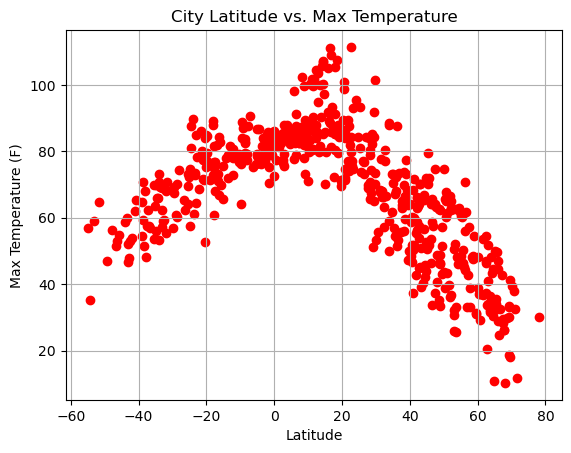

In [9]:
#Build scatter plot for latitude vs. temperature
x = df_city_data["Lat"]
y = df_city_data["Max Temp"]

fig, scat = plt.subplots()

scat.scatter(x, y, color='red')

#Incorporate the other graph properties
scat.set_title('City Latitude vs. Max Temperature')
scat.set_xlabel('Latitude')
scat.set_ylabel('Max Temperature (F)')
scat.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

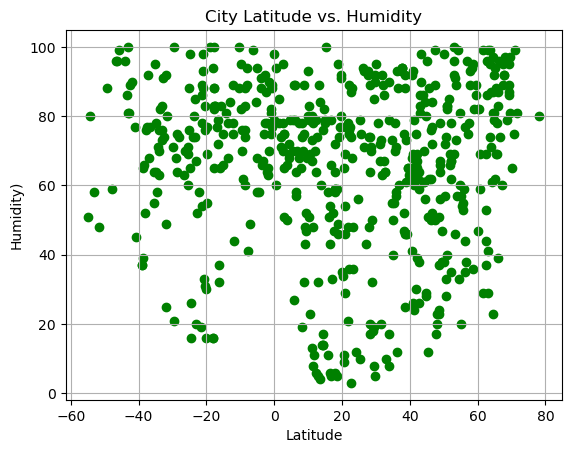

In [10]:
#Build scatter plot for latitude vs. Humidity
y = df_city_data["Humidity"]
fig, scat2 = plt.subplots()

scat2.scatter(x, y, color='green')

#Incorporate the other graph properties
scat2.set_title('City Latitude vs. Humidity')
scat2.set_xlabel('Latitude')
scat2.set_ylabel('Humidity)')
scat2.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

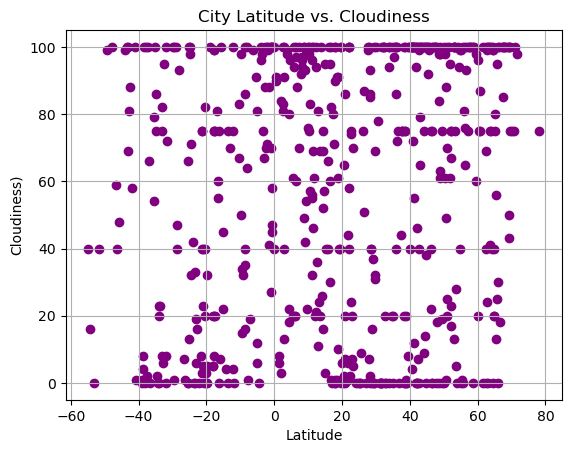

In [11]:
#Build scatter plot for latitude vs. temperature
y = df_city_data["Cloudiness"]
fig, scat3 = plt.subplots()

scat3.scatter(x, y, color='purple')

#Incorporate the other graph properties
scat3.set_title('City Latitude vs. Cloudiness')
scat3.set_xlabel('Latitude')
scat3.set_ylabel('Cloudiness)')
scat3.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

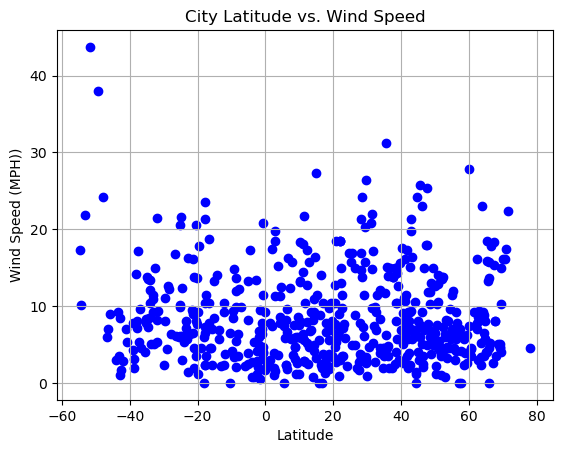

In [12]:
#Build scatter plot for latitude vs. temperature
y = df_city_data["Wind Speed"]
fig, scat4 = plt.subplots()

scat4.scatter(x, y, color='blue')

#Incorporate the other graph properties
scat4.set_title('City Latitude vs. Wind Speed')
scat4.set_xlabel('Latitude')
scat4.set_ylabel('Wind Speed (MPH))')
scat4.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def Linear_Regression(X_values, Y_values, title, y_label, text_coordinates):
    slope, intercept, rvalue, pvalue, stderr = linregress(X_values, Y_values)
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    r_squared = f"r-squared = {rvalue**2:.2f}"
    return (line_eq, r_squared, slope, intercept)

In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
northern_hemi_df = df_city_data.loc[df_city_data["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tiksi,71.6872,128.8694,11.68,81,98,22.44,RU,1683299917
3,ponta delgada,37.7333,-25.6667,65.12,94,75,13.80,PT,1683299918
4,albany,42.6001,-73.9662,57.45,59,99,2.28,US,1683299919
5,batamshinskiy,50.5594,58.2747,60.22,28,88,10.25,KZ,1683299919
7,constantia,44.1833,28.6500,66.70,70,9,10.49,RO,1683299919


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = df_city_data.loc[df_city_data["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yura,-16.2522,-71.6797,66.72,32,75,4.61,PE,1683299916
2,puerto natales,-51.7236,-72.4875,64.85,48,40,43.73,CL,1683299917
6,santa adelia,-21.2428,-48.8042,80.04,54,3,6.46,BR,1683299919
8,grytviken,-54.2811,-36.5092,35.29,80,16,10.11,GS,1683299919
11,margaret river,-33.9500,115.0667,53.38,70,23,13.35,AU,1683299920


###  Temperature vs. Latitude Linear Regression Plot

Text(0.5, 1.0, 'temperature vs latitude')

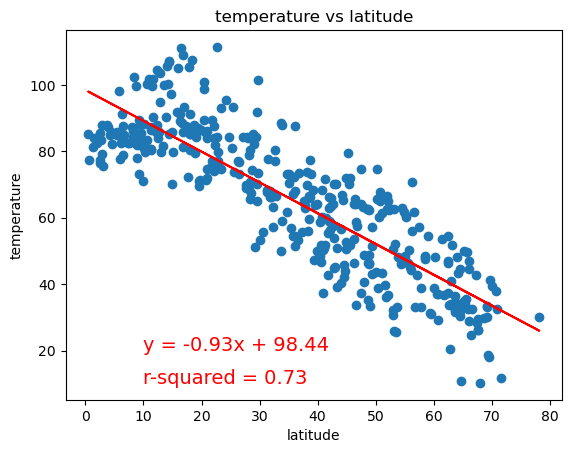

In [16]:
 #Create scatter plot
x= northern_hemi_df["Lat"]
y= northern_hemi_df["Max Temp"]
text_coordinates = (10,20)
title = "temperature vs latitude"
ylabel = "temperature"


line_eq, r_squared, slope, intercept = Linear_Regression(x, y , title, ylabel, text_coordinates)


plt.scatter(x, y)

    # Add linear regression line and equation
plt.plot(x, slope * x + intercept, color="r")
plt.annotate(line_eq, text_coordinates, color="r", fontsize=14)
plt.annotate(r_squared, (text_coordinates[0], text_coordinates[1]-10), color="r", fontsize=14)

# Add labels and title
plt.xlabel("latitude")
plt.ylabel(ylabel)
plt.title(title)














Text(0.5, 1.0, 'temperature vs latitude')

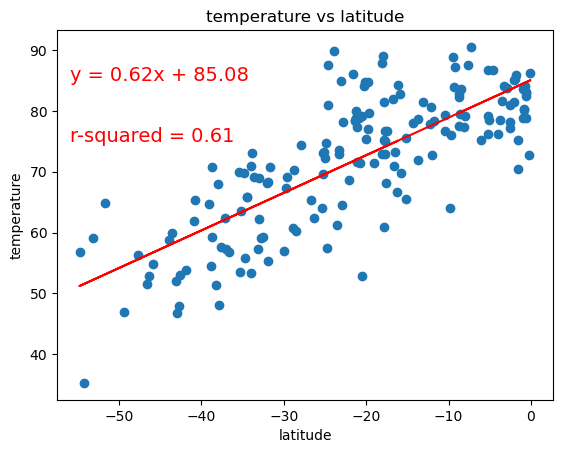

In [17]:
 #Create scatter plot
x= southern_hemi_df["Lat"]
y= southern_hemi_df["Max Temp"]
text_coordinates = (-56,85)
title = "temperature vs latitude"
ylabel = "temperature"


line_eq, r_squared, slope, intercept = Linear_Regression(x, y , title, ylabel, text_coordinates)


plt.scatter(x, y)

    # Add linear regression line and equation
plt.plot(x, slope * x + intercept, color="r")
plt.annotate(line_eq, text_coordinates, color="r", fontsize=14)
plt.annotate(r_squared, (text_coordinates[0], text_coordinates[1]-10), color="r", fontsize=14)

# Add labels and title
plt.xlabel("latitude")
plt.ylabel(ylabel)
plt.title(title)


**Discussion about the linear relationship:** Southern Hemisphere has positive correlated Temp to Latitude while Northern has negatively correlated Temp to Lat. However, the southern hemisphere's lowest temperatures aren't as cold.

### Humidity vs. Latitude Linear Regression Plot

Text(0.5, 1.0, 'humidity vs latitude')

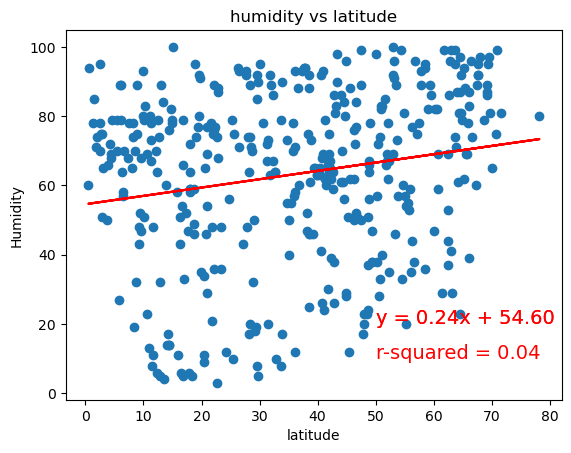

In [49]:
x= northern_hemi_df["Lat"]
y= northern_hemi_df["Humidity"]
text_coordinates = (50,20)
title = "humidity vs latitude"
ylabel = "Humidity"


line_eq, r_squared, slope, intercept = Linear_Regression(x, y , title, ylabel, text_coordinates)


plt.scatter(x, y)

    # Add linear regression line and equation
plt.plot(x, slope * x + intercept, color="r")
plt.annotate(line_eq, text_coordinates, color="r", fontsize=14)
plt.annotate(r_squared, (text_coordinates[0], text_coordinates[1] -50), color="r", fontsize=14)

# Add labels and title
plt.xlabel("latitude")
plt.ylabel(ylabel)
plt.title(title)

  # Add linear regression line and equation
plt.plot(x, slope * x + intercept, color="r")
plt.annotate(line_eq, text_coordinates, color="r", fontsize=14)
plt.annotate(r_squared, (text_coordinates[0], text_coordinates[1]-10), color="r", fontsize=14)

# Add labels and title
plt.xlabel("latitude")
plt.ylabel(ylabel)
plt.title(title)



Text(0.5, 1.0, 'humidity vs latitude')

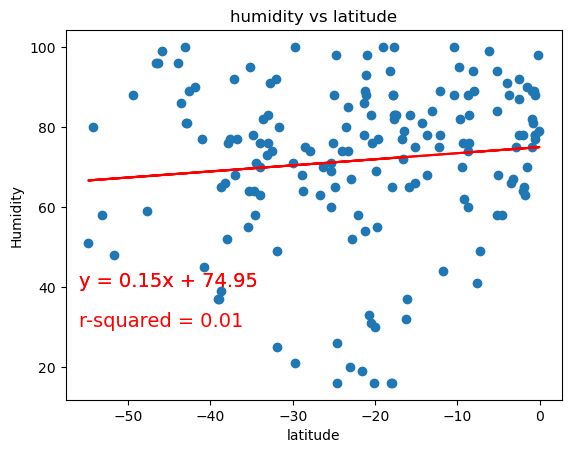

In [50]:
x= southern_hemi_df["Lat"]
y= southern_hemi_df["Humidity"]
text_coordinates = (-56,40)
title = "humidity vs latitude"
ylabel = "Humidity"


line_eq, r_squared, slope, intercept = Linear_Regression(x, y , title, ylabel, text_coordinates)


plt.scatter(x, y)

    # Add linear regression line and equation
plt.plot(x, slope * x + intercept, color="r")
plt.annotate(line_eq, text_coordinates, color="r", fontsize=14)
plt.annotate(r_squared, (text_coordinates[0], text_coordinates[1] -50), color="r", fontsize=14)

# Add labels and title
plt.xlabel("latitude")
plt.ylabel(ylabel)
plt.title(title)
  # Add linear regression line and equation
plt.plot(x, slope * x + intercept, color="r")
plt.annotate(line_eq, text_coordinates, color="r", fontsize=14)
plt.annotate(r_squared, (text_coordinates[0], text_coordinates[1]-10), color="r", fontsize=14)

# Add labels and title
plt.xlabel("latitude")
plt.ylabel(ylabel)
plt.title(title)



Neither hemisphere has very correlated data.

### Cloudiness vs. Latitude Linear Regression Plot

Text(0.5, 1.0, 'Cloudiness vs latitude')

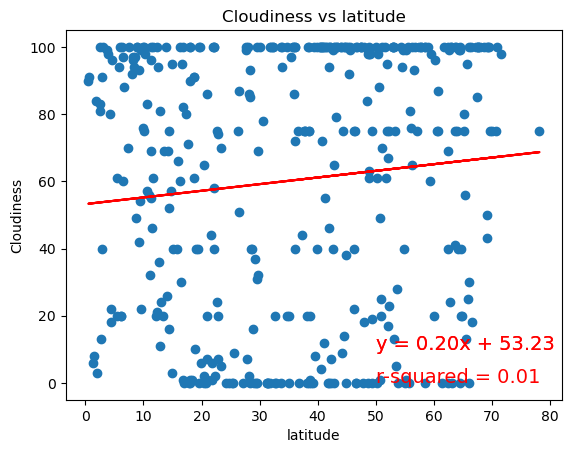

In [51]:
x= northern_hemi_df["Lat"]
y= northern_hemi_df["Cloudiness"]
text_coordinates = (50,10)
title = "Cloudiness vs latitude"
ylabel = "Cloudiness"


line_eq, r_squared, slope, intercept = Linear_Regression(x, y , title, ylabel, text_coordinates)


plt.scatter(x, y)

    # Add linear regression line and equation
plt.plot(x, slope * x + intercept, color="r")
plt.annotate(line_eq, text_coordinates, color="r", fontsize=14)
plt.annotate(r_squared, (text_coordinates[0], text_coordinates[1] -50), color="r", fontsize=14)

# Add labels and title
plt.xlabel("latitude")
plt.ylabel(ylabel)
plt.title(title)
  # Add linear regression line and equation
plt.plot(x, slope * x + intercept, color="r")
plt.annotate(line_eq, text_coordinates, color="r", fontsize=14)
plt.annotate(r_squared, (text_coordinates[0], text_coordinates[1]-10), color="r", fontsize=14)

# Add labels and title
plt.xlabel("latitude")
plt.ylabel(ylabel)
plt.title(title)


Text(0.5, 1.0, 'Cloudiness vs latitude')

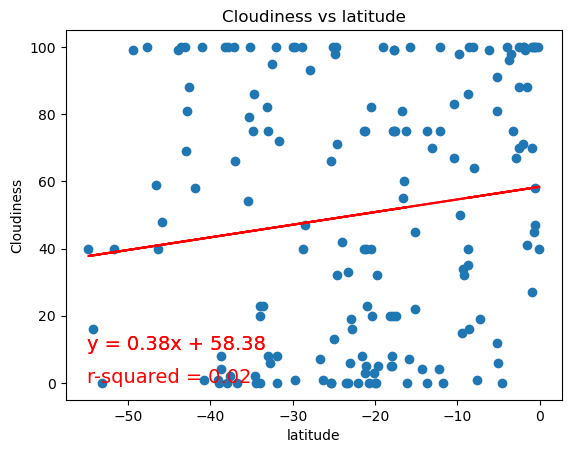

In [52]:
x= southern_hemi_df["Lat"]
y= southern_hemi_df["Cloudiness"]
text_coordinates = (-55,10)
title = "Cloudiness vs latitude"
ylabel = "Cloudiness"


line_eq, r_squared, slope, intercept = Linear_Regression(x, y , title, ylabel, text_coordinates)


plt.scatter(x, y)

    # Add linear regression line and equation
plt.plot(x, slope * x + intercept, color="r")
plt.annotate(line_eq, text_coordinates, color="r", fontsize=14)
plt.annotate(r_squared, (text_coordinates[0], text_coordinates[1] -50), color="r", fontsize=14)

# Add labels and title
plt.xlabel("latitude")
plt.ylabel(ylabel)
plt.title(title)
  # Add linear regression line and equation
plt.plot(x, slope * x + intercept, color="r")
plt.annotate(line_eq, text_coordinates, color="r", fontsize=14)
plt.annotate(r_squared, (text_coordinates[0], text_coordinates[1]-10), color="r", fontsize=14)

# Add labels and title
plt.xlabel("latitude")
plt.ylabel(ylabel)
plt.title(title)


**Discussion about the linear relationship:** The data between cloudiness and latitude has extremely little correlation in both hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

Text(0.5, 1.0, 'Wind Speed vs latitude')

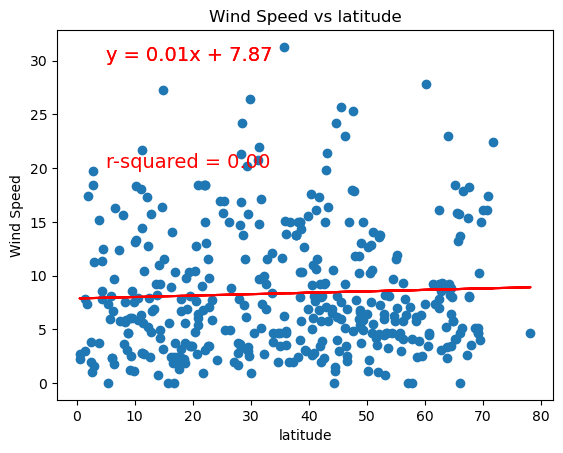

In [53]:
x= northern_hemi_df["Lat"]
y= northern_hemi_df["Wind Speed"]
text_coordinates = (5,30)
title = "Wind Speed vs latitude"
ylabel = "Wind Speed"


line_eq, r_squared, slope, intercept = Linear_Regression(x, y , title, ylabel, text_coordinates)


plt.scatter(x, y)

    # Add linear regression line and equation
plt.plot(x, slope * x + intercept, color="r")
plt.annotate(line_eq, text_coordinates, color="r", fontsize=14)
plt.annotate(r_squared, (text_coordinates[0], text_coordinates[1] -50), color="r", fontsize=14)

# Add labels and title
plt.xlabel("latitude")
plt.ylabel(ylabel)
plt.title(title)
  # Add linear regression line and equation
plt.plot(x, slope * x + intercept, color="r")
plt.annotate(line_eq, text_coordinates, color="r", fontsize=14)
plt.annotate(r_squared, (text_coordinates[0], text_coordinates[1]-10), color="r", fontsize=14)

# Add labels and title
plt.xlabel("latitude")
plt.ylabel(ylabel)
plt.title(title)


Text(0.5, 1.0, 'Wind Speed vs latitude')

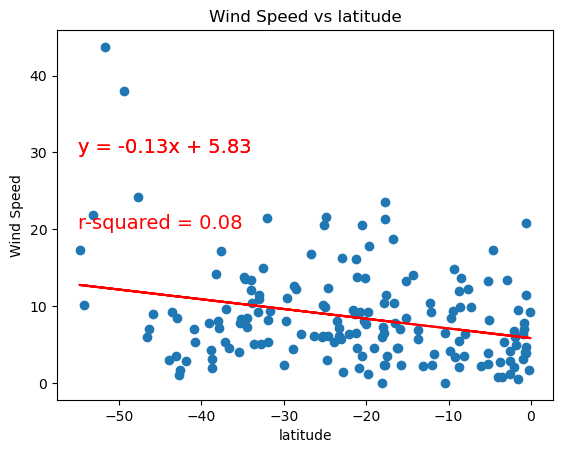

In [54]:
x= southern_hemi_df["Lat"]
y= southern_hemi_df["Wind Speed"]
text_coordinates = (-55,30)
title = "Wind Speed vs latitude"
ylabel = "Wind Speed"


line_eq, r_squared, slope, intercept = Linear_Regression(x, y , title, ylabel, text_coordinates)


plt.scatter(x, y)

    # Add linear regression line and equation
plt.plot(x, slope * x + intercept, color="r")
plt.annotate(line_eq, text_coordinates, color="r", fontsize=14)
plt.annotate(r_squared, (text_coordinates[0], text_coordinates[1] -50), color="r", fontsize=14)

# Add labels and title
plt.xlabel("latitude")
plt.ylabel(ylabel)
plt.title(title)
  # Add linear regression line and equation
plt.plot(x, slope * x + intercept, color="r")
plt.annotate(line_eq, text_coordinates, color="r", fontsize=14)
plt.annotate(r_squared, (text_coordinates[0], text_coordinates[1]-10), color="r", fontsize=14)

# Add labels and title
plt.xlabel("latitude")
plt.ylabel(ylabel)
plt.title(title)


**Discussion about the linear relationship:** We can see a slight correlation in the southern hemisphere that's negative. The wind speed gets slower as the latitude gets closer to 0.